#  Seattle housing Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [16]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import HoverTool

In [17]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [18]:
def seattle_region_map():
    """ Seattle Region Map."""
    pct_change_df = pd.read_csv("dashboard/pct_change_df.csv")
    pct_change_df_map = px.scatter_mapbox(
        pct_change_df,
        lat="latitude",
        lon="longitude",
        color="pct_change",
        size="pct_change",
        hover_name="Region", 
        hover_data=["pct_change"],
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=12,
        zoom=8
    )

    return pn.pane.Plotly(pct_change_df_map)

In [19]:
def top15_expensive_cities_plot():
    """ Top 15 Most Expensive Cities."""
    top15_expensive_cities = pd.read_csv("dashboard/top15_expensive_cities.csv")
    
    top15_expensive_cities_plot = top15_expensive_cities.hvplot.bar(
        x = "Region",
        y = "Median Sale Price",
        xlabel='Region',
        ylabel='Median sale Price',
        title = "Top 15 Most Expensive Cities in Greater Seattle area",
        height=450,
        rot = 90
    ).opts(yformatter='%0.0f')
    
    return top15_expensive_cities_plot

In [20]:
def pct_change_prices_plot():
    """ Percent Change In Median Sale Prices Plot."""
    pct_change_prices_df = pd.read_csv("dashboard/pct_change_prices_df.csv")
    pct_change_prices_df['Date'] = pd.to_datetime(pct_change_prices_df['Date'])
    pct_change_prices_df_plot = pct_change_prices_df.hvplot.line(
        xformatter = DatetimeTickFormatter(months = ['%m/%Y', '%b %Y'], years = ['%b %Y']),
        x='Date',
        y='pct_change', 
        xlabel='Date', 
        ylabel='% Change Median Sale Price', 
        color='purple', 
        width = 500,
        title='Percentage Change In Median Sale Price',
        rot=45,
        groupby='Region'
        )
    hover = HoverTool(tooltips=[("Change", "@pct_change{0.2f}%"),
                                ("Date",  "@Date{%Y/%m/%d}")
                               ],
                      formatters = {'@Date': 'datetime'}
                     )
    pct_change_prices_df_plot.opts(tools=[hover])
    return pct_change_prices_df_plot

In [21]:
def housing_price_plot(): 
    """ Median Sale Prices Plot."""
    
    housing_price_year_end_df = pd.read_csv("dashboard/housing_price_year_end_df.csv")
    housing_price_df = pd.read_csv("dashboard/housing_price_df1.csv")
    housing_price_df.drop(columns = ["Unnamed: 0"])
    housing_price_df_sort = pd.read_csv("dashboard/housing_price_df_sort.csv")
    housing_price_df_sort['Date'] = pd.to_datetime(housing_price_df['Date'])
    housing_price_year_end_df = housing_price_df_sort[housing_price_df_sort['Date'].dt.is_year_end]
    housing_price_year_end_df.head()
    housing_price_plot = housing_price_year_end_df.hvplot.line(
        x='Date', 
        y='Median Sale Price', 
        xlabel='Date', 
        ylabel='Median Sale Price(K)', 
        color='purple', 
        width = 500,
        title='Median Sale Price',
        rot=45,
        groupby='Region'
        )

    hover = HoverTool(tooltips=[("Median Sale Price", "@{Median Sale Price}"),
                            ("Date",  "@Date{%Y/%m/%d}")
                           ],
                  formatters = {'@Date': 'datetime'}
                 )
    housing_price_plot.opts(tools=[hover], yformatter='%f')
    
    return housing_price_plot

In [22]:
def housing_inventory_corr():
    """ Housing Price Correlation."""
    
    housing_price_df = pd.read_csv("dashboard/housing_price_df.csv", index_col="Date")
    corr_plot = sns.heatmap(housing_price_df.corr(), vmin=-1, vmax=1, annot=True)
    
    return corr_plot 

In [23]:
def housing_asset_return_corr():
    """ Housing Price and Asset price Return Correlation."""
        
    correlation = pd.read_csv("dashboard/correlation.csv")
    corr2_plot = sns.heatmap(correlation.corr(), vmin=-1, vmax=1, annot=True) 
    
    return corr2_plot 

In [24]:
def housing_asset_return_plot():
    """ Housing Price and Asset price Return Plot."""
        
    all_returns = pd.read_csv("dashboard/all_returns.csv", index_col="Date") 
    all_return_plot = all_returns.plot.line().figure
    
    return all_return_plot 

In [25]:
def housing_asset_corr():
    """ Housing Price and Asset price Correlation."""
        
    correlation_2 = pd.read_csv("dashboard/correlation_2.csv") 
    corr3_plot = sns.heatmap(correlation_2.corr(), vmin=-1, vmax=1, annot=True).figure
    
    return corr3_plot 

In [26]:
def housing_asset_plot():
    """ Housing Price and Asset price Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv", index_col="Date")
    combined_df_asset_plot = combined_df_asset.plot().figure
    
    return combined_df_asset_plot

In [27]:
def amnz_median_price_plot():
    """ AMZN and Median Price Scatter Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    amnz_plot = combined_df_asset.plot(kind='scatter', x='AMZN', y='Median Sale Price').figure
    
    return amnz_plot


def msft_median_price_plot():
    """ MSFT and Median Price Scatter Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    msft_plot = combined_df_asset.plot(kind='scatter', x='MSFT', y='Median Sale Price').figure
    
    return msft_plot


def btc_median_price_plot():
    """ BTC and Median Price Scatter Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    btc_plot = combined_df_asset.plot(kind='scatter', x='BTC', y='Median Sale Price').figure
    
    return btc_plot


def ba_median_price_plot():
    """ BA and Median Price Scatter Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    ba_plot = combined_df_asset.plot(kind='scatter', x='BA', y='Median Sale Price').figure
    
    return ba_plot


def gold_median_price_plot():
    """ Gold and Median Price Scatter Plot."""
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    gold_plot = combined_df_asset.plot(kind='scatter', x='Gold', y='Median Sale Price').figure
    
    return gold_plot


def tbond_median_price_plot():
    """ 30 T-Bond and Median Price Scatter Plot."""
    
    combined_df_asset = pd.read_csv("dashboard/combined_df_asset.csv")
    
    tbond_plot = combined_df_asset.plot(kind='scatter', x='30 T-Bond', y='Median Sale Price').figure
    
    return tbond_plot

In [28]:
def linear_regression_plot():
    """ Linear Regression Plot."""
    file_path = Path("../Resources/housing_prices_month_aggregate_clean.csv") 
    housing_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
    file_path = Path("../Resources/Asset_Prices_Month.csv") 
    asset_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
    asset_data_refined_1 = asset_data.drop(columns=["MSFT", "BTC", "Gold", "BA", "30 T-Bond"])
    amzn_housing_data = pd.concat([asset_data_refined_1, housing_data], axis="columns", join="inner")
    amzn_housing_data
    
    data = amzn_housing_data
    X = data.iloc[:, 0].values.reshape(-1, 1)
    Y = data.iloc[:, 1].values.reshape(-1, 1)    
    lr = LinearRegression()
    lr.fit(X, Y)
    Y_pred = lr.predict(X)
    lr_plot = plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red') 
    
    return lr_plot          

In [29]:
def linear_regression_map():
    """Linear Regression Map."""
    pct_change_future_price_df = pd.read_csv("dashboard/pct_change_future_price_df.csv")
    pct_change_future_price_df_map = px.scatter_mapbox(
    pct_change_future_price_df,
    lat="latitude",
    lon="longitude",
    color="pct_change",
    size="pct_change",
    hover_name="Region", 
    hover_data=["pct_change"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=12,
    zoom=8
    )
  
    return pn.pane.Plotly(pct_change_future_price_df_map)

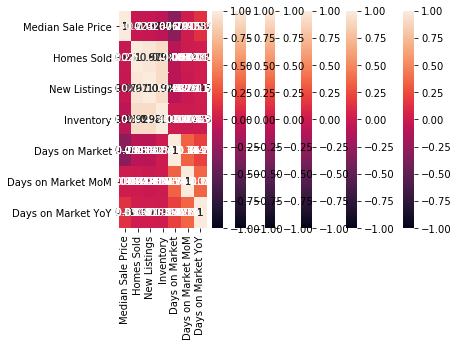

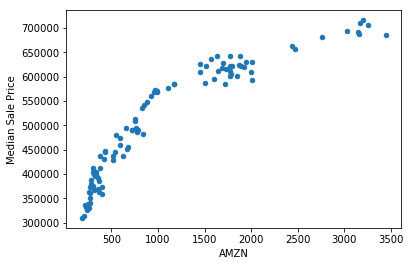

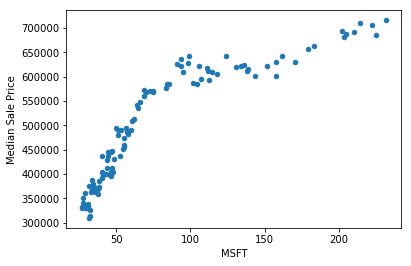

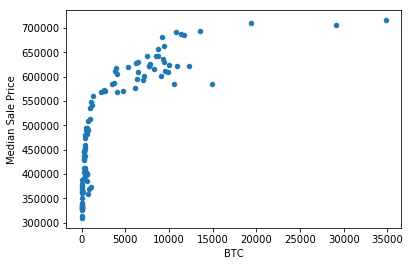

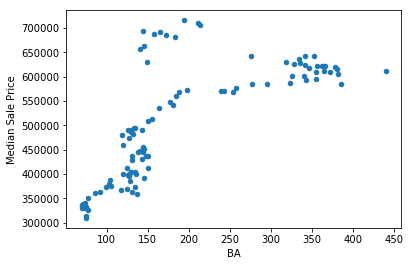

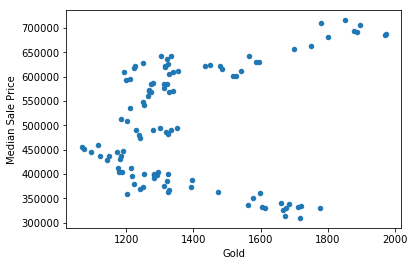

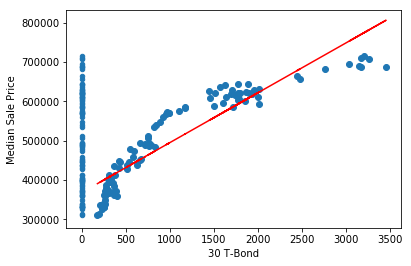

In [30]:
# Create a Title for the Dashboard
dashboard_title = '# Housing Prices Analysis of Seattle From 2012 to 2021'

dashboard_text = '''
This dashboard presents a visual analysis of historical housing prices for Seattle from 2012 to 2021. 
We can navigate through the tabs above to explore more details about the analysis.
'''

welcome_column = pn.Column( 
    seattle_region_map(),
    linear_regression_map()
    )


market_analysis_column = pn.Column(
    pct_change_prices_plot(),
    housing_price_plot(),
    top15_expensive_cities_plot()    
    )


correlation_column = pn.Column(
    housing_asset_corr(),    
    housing_asset_return_corr(),   
    housing_inventory_corr()
    )

correlation_plot_column = pn.Column(
    housing_asset_corr(),    
    housing_asset_return_corr(),   
    housing_inventory_corr()
)

scatter_column = pn.Column(
    amnz_median_price_plot(),
    msft_median_price_plot(),
    btc_median_price_plot(),
    ba_median_price_plot(),
    gold_median_price_plot(),
    tbond_median_price_plot()
    )


linear_regression_column = pn.Column(
    linear_regression_plot()
    )


# Create a tab layout for the dashboard
tab = pn.Tabs(
        ("Welcome", welcome_column),
        ("Market Analysis", market_analysis_column),
        ("Correlation", correlation_column),
        ("Scatter Plot", scatter_column),
        ("Linear Regression", linear_regression_column)
        )

# Create the dashboard
dashboard = pn.Column(
    dashboard_title, 
    dashboard_text,
    tab
    )

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Tabs
        [0] Column
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Region', options=['Auburn', 'Bainbridge Isl...], value='Auburn', width=250)
                    [1] VSpacer()
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Region', options=['Auburn', 'Bainbridge Isl...], value='Auburn', width=250)
                    [1] VSpacer()
            [2] HoloViews(Bars)
        [2] Column
            [0] Matplotlib(Figure)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
        [3] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
            [3] Matplotlib(Figure)
            [4] Matplotlib(Figure)
            [5] Matplotlib(Figure)
        [4] Column
            [0] Str(PathCollection)
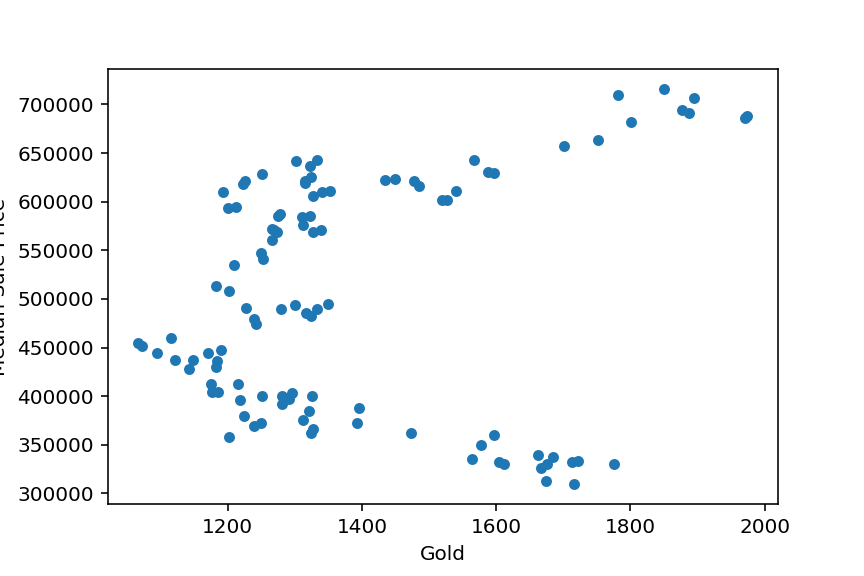
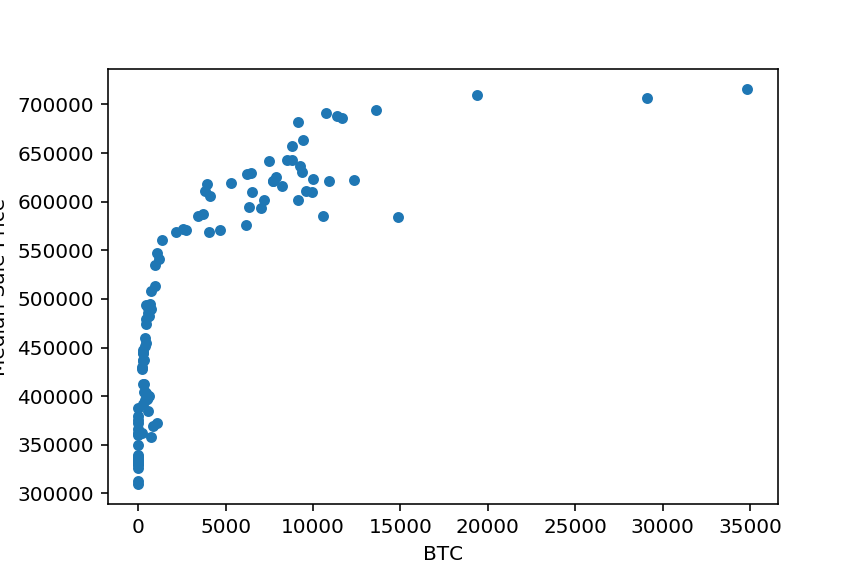
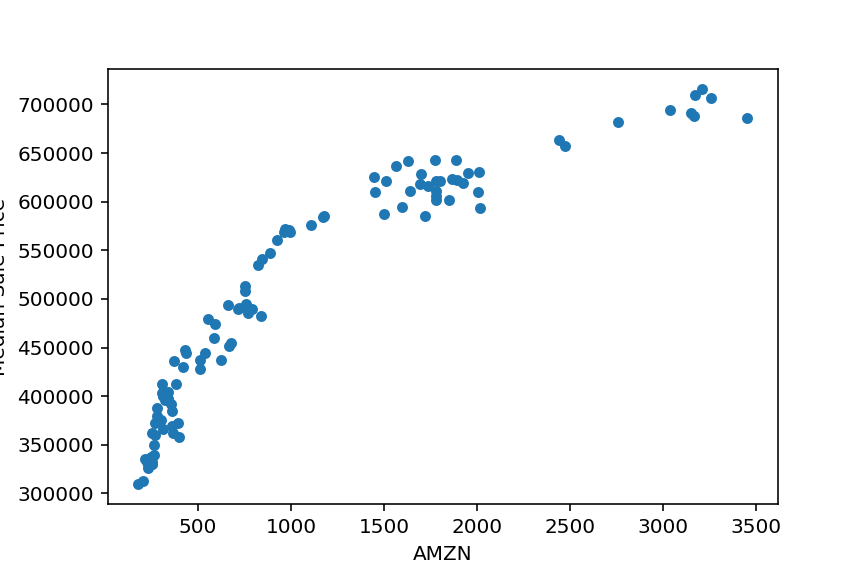
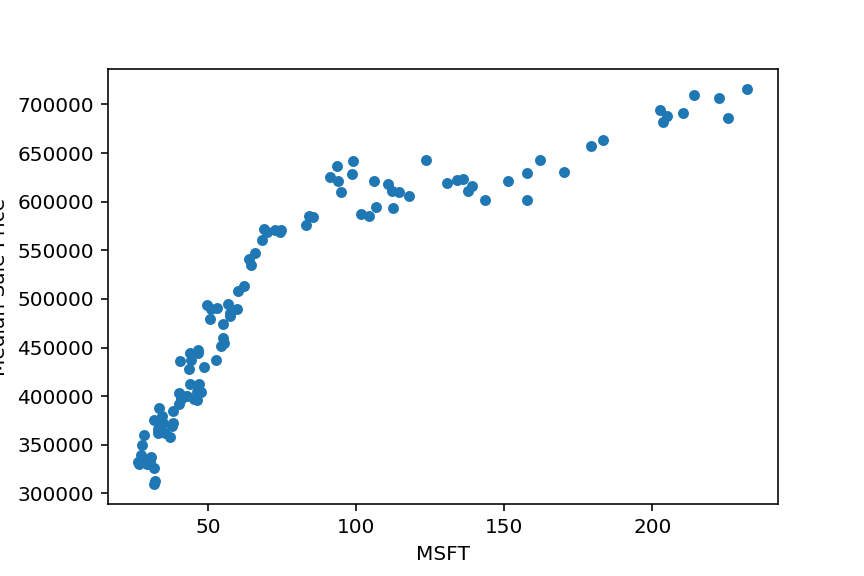
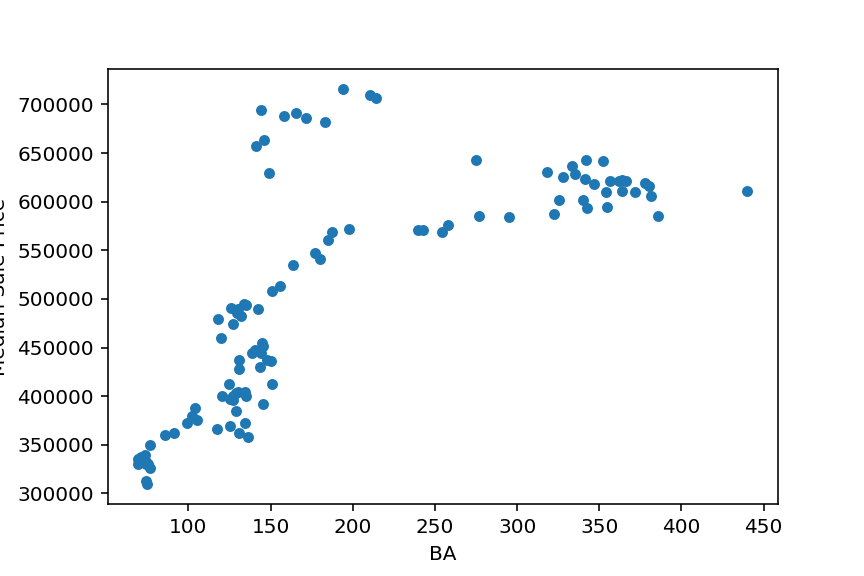
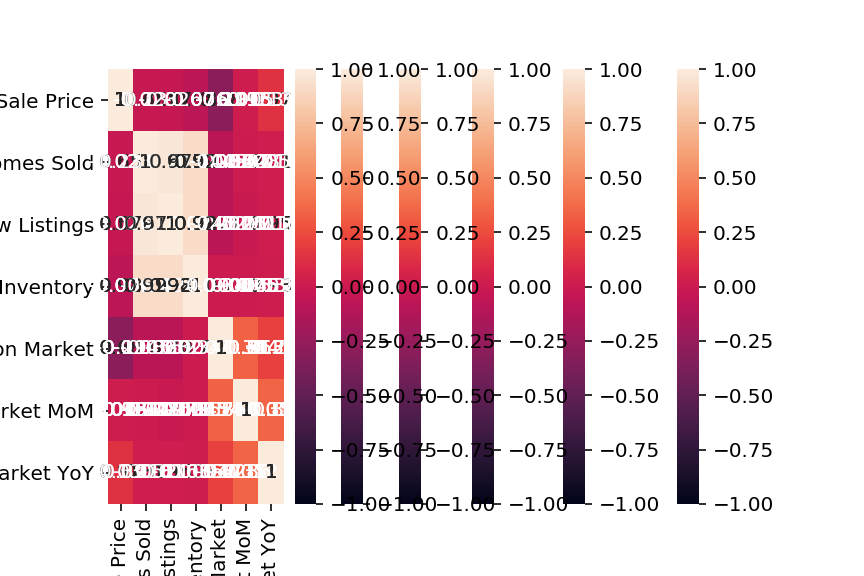
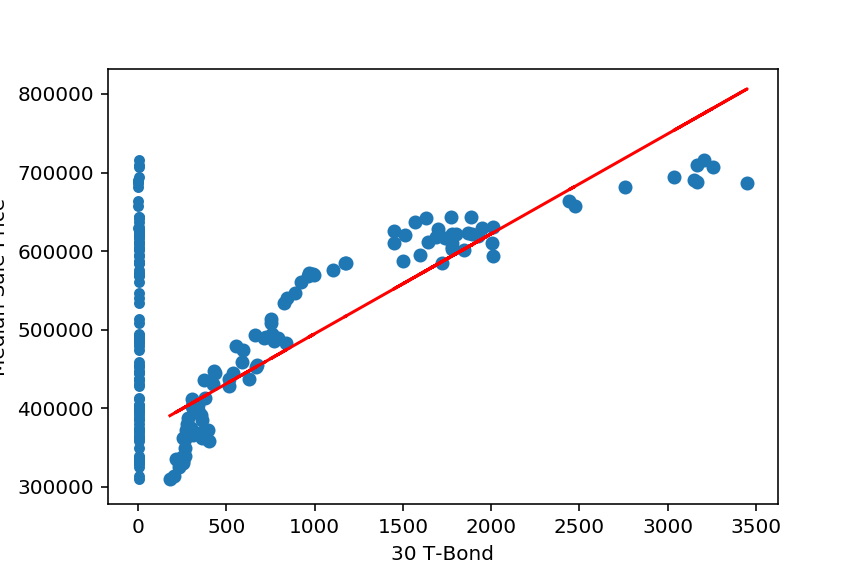

In [31]:
# Serve the dashboard
dashboard.servable()